In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
import sklearn.datasets as ds
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Lasso

C:\Users\vylsm\Miniconda3\envs\tpADS\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
digits = datasets.load_digits()
digits.images.shape
X=digits.data
y=digits.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
#print(X_test.shape)
#print(X_train.shape)

(540, 64)
(1257, 64)


In [34]:
def AD(size):
    X_reshape=X_train[0:size]
    y_reshape=y_train[0:size]
    clf = Perceptron()
    clf = clf.fit(X_reshape,y_reshape)
    #print(X_test.shape)
    sTest = 1-clf.score(X_test,y_test)
    sTrain =1-clf.score(X_reshape,y_reshape)
    return sTest,sTrain

In [35]:
Taille=(10,15,25,35,50,75,100,150,200,250,375,500,750,1000,1257)

In [36]:
score_Test=np.arange(float(len(Taille)))
score_Train=np.arange(float(len(Taille)))

In [37]:
for k in range(len(Taille)):
    score_Test[k]=0
    score_Train[k] = 0
for j in range(10):   
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    for i in range(len(Taille)):
        [sTest,sTrain]=AD(Taille[i])
        score_Test[i]+=sTest
        score_Train[i]+=sTrain
        #print("score \n")
        #print(score_Train)
        #print(score_Test)
for u in range(len(Taille)):
    score_Test[u] = score_Test[u]/10
    score_Train[u] = score_Train[u]/10

C:\Users\vylsm\Miniconda3\envs\tpADS\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


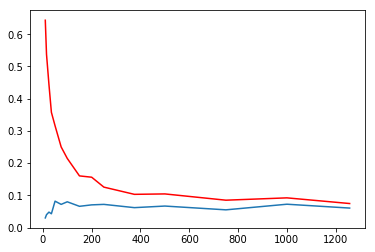

In [38]:
plt.plot(Taille,score_Test,color='red')
plt.plot(Taille,score_Train)
plt.show()